In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import numpy as np
import sys
import time
import pandas as pd
import cv2
import os
import imageio
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import masks
import gif
import raw
import lineage

In [3]:
a = pd.read_hdf("../22956814/22956814_featuresN.hdf5", '/trajectories_data')

In [4]:
qwerty = a

In [7]:
qwerty  # WEIRD!!!!!!!

,timestamp_raw,timestamp_time,worm_index_joined,coord_x,coord_y,threshold,roi_size,area,frame_number,was_skeletonized,skeleton_id,old_trajectory_data_index,worm_label,worm_index_manual,has_skeleton
0,0,0.00,3,575.574768,2801.019287,115.500000,92.0,542.5,0,1,0,0,0,3,True
1,1,0.04,3,577.056580,2801.392334,115.500000,92.0,542.5,1,1,1,1,0,3,True
2,2,0.08,3,578.351135,2801.704834,115.500000,92.0,542.5,2,1,2,2,0,3,True
3,3,0.12,3,579.473755,2801.961914,115.500000,92.0,542.5,3,1,3,3,0,3,True
4,4,0.16,3,580.439819,2802.168457,115.500000,92.0,542.5,4,1,4,4,0,3,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506303,8997,359.88,6008,3205.449951,2594.350098,68.199997,23.0,28.5,8997,0,-1,506303,0,6008,False
506304,8998,359.92,6008,3205.550049,2594.149902,68.199997,23.0,25.5,8998,0,-1,506304,0,6008,False
506305,8999,359.96,6008,3205.550049,2594.149902,68.199997,23.0,25.5,8999,0,-1,506305,0,6008,False
506306,9000,360.00,6008,3206.086182,2594.465576,68.199997,23.0,31.0,9000,0,-1,506306,0,6008,False


In [2]:
# Input file
fN = h5py.File("../22956814/22956814_featuresN.hdf5", "r")

# Define dorsal and ventral coordinates
coordinates = fN['coordinates']
dorsal = coordinates['dorsal_contours']
ventral = coordinates['ventral_contours']

# trajectory_data and timeseries_data
#qwerty = pd.read_hdf("../22956814/22956814_featuresN.hdf5", '/trajectories_data')
timeseries = fN['timeseries_data']

In [9]:
# Get wells - data from timeseries_data, at position [2]

wells = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']
#wells = [each.encode() for each in wells]

well_dict = {}
for each in wells:
    well_dict[each] = []
    
#print('A1'.encode().decode())
for i, each in enumerate(timeseries[:]):  # "i" == index
    well = each[2].decode()
    if well in well_dict.keys():
        well_dict[well].append(i)

In [10]:
# get well by well, and store
d4 = [180, 710, 160, 690]
d3 = [180, 710, 880, 1410]
d2 = [180, 710, 1600, 2130]
d1 = [180, 710, 2320, 2850]

c4 = [895, 1425, 160, 690]
c3 = [895, 1425, 880, 1410]
c2 = [895, 1425, 1600, 2130]
c1 = [895, 1425, 2320, 2850]

b4 = [1620, 2150, 160, 690]
b3 = [1620, 2150, 880, 1410]
b2 = [1620, 2150, 1600, 2130]
b1 = [1620, 2150, 2320, 2850]

a4 = [2340, 2870, 160, 690]
a3 = [2340, 2870, 880, 1410]
a2 = [2340, 2870, 1600, 2130]
a1 = [2340, 2870, 2320, 2850]

In [13]:
well_names = list(well_dict.keys())
well_names

['A1',
 'A2',
 'A3',
 'A4',
 'B1',
 'B2',
 'B3',
 'B4',
 'C1',
 'C2',
 'C3',
 'C4',
 'D1',
 'D2',
 'D3',
 'D4']

In [ ]:
for well in well_names:
    masks.make_well_masks(well=well, traj=qwerty, dorsal=dorsal, ventral=ventral, well_dict=well_dict, down_sampling=6, file_dir="../22956814/", sequential=False)

# Make raw wells 
well by well

In [18]:
wells = [a1, a2, a3, a4, b1, b2, b3, b4, c1, c2, c3, c4, d1, d2, d3, d4]

In [19]:
well_names = ['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4']

In [ ]:
#for i, well_name in enumerate(well_names):
#    output = "../22956814/raw_wells/%s_raw.npy" % well_name
#    raw.get_raw_well(wells[i], well_name=well_name, video_path="../22956814/22956814.mp4", filename=output, frame_start=0, frame_end=9001, down_sampling=1) 

In [ ]:
for well_name in well_names:
    raw_video_path = '../22956814/raw_wells/%s_raw.npy' % well_name
    txt = '../22956814/%s_not_empty.txt' % well_name
    raw.make_raw_videos(raw_video_path=raw_video_path, mask_frame_info_fn=txt, well_name=well_name, output_dir='../22956814')

Processing raw video.
unique_worm_ids:  [34, 38]
sequential ids:  [1, 2]
Processing raw video.
unique_worm_ids:  [20]
sequential ids:  [1]


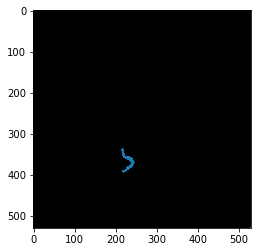

In [22]:
gif.plot_gif(np.load('../22956814/C3_raw_1.npy'), '../22956814/gif/C3_raw_1.gif', raw=True)
gif.plot_gif(np.load('../22956814/C3_mask_1.npy'), '../22956814/gif/C3_mask_1.gif')

gif.plot_gif(np.load('../22956814/B1_raw_1.npy'), '../22956814/gif/B1_raw_1.gif', raw=True)
gif.plot_gif(np.load('../22956814/B1_mask_1.npy'), '../22956814/gif/B1_mask_1.gif')

# Lineages

In [7]:
import lineage

In [11]:
a1_1 = lineage.make_lineage(qwerty, well_dict, 'A1', '22956814', "../22956814/A1_mask_1.npy", 1) 

# Well A2
a2_1 = lineage.make_lineage(qwerty, well_dict, 'A2', '22956814', "../22956814/A2_mask_1.npy", 1) 
a2_2 = lineage.make_lineage(qwerty, well_dict, 'A2', '22956814', "../22956814/A2_mask_2.npy", 2) 
a2_3 = lineage.make_lineage(qwerty, well_dict, 'A2', '22956814', "../22956814/A2_mask_3.npy", 3) 
a2_4 = lineage.make_lineage(qwerty, well_dict, 'A2', '22956814', "../22956814/A2_mask_4.npy", 4) 
a2_5 = lineage.make_lineage(qwerty, well_dict, 'A2', '22956814', "../22956814/A2_mask_5.npy", 5) 

# Well A3
a3_1 = lineage.make_lineage(qwerty, well_dict, 'A3', '22956814', "../22956814/A3_mask_1.npy", 1) 
a3_2 = lineage.make_lineage(qwerty, well_dict, 'A3', '22956814', "../22956814/A3_mask_2.npy", 2) 
a3_3 = lineage.make_lineage(qwerty, well_dict, 'A3', '22956814', "../22956814/A3_mask_3.npy", 3) 
a3_4 = lineage.make_lineage(qwerty, well_dict, 'A3', '22956814', "../22956814/A3_mask_4.npy", 4) 
a3_5 = lineage.make_lineage(qwerty, well_dict, 'A3', '22956814', "../22956814/A3_mask_5.npy", 5) 

# Well A4
a4_1 = lineage.make_lineage(qwerty, well_dict, 'A4', '22956814', "../22956814/A4_mask_1.npy", 1) 
a4_2 = lineage.make_lineage(qwerty, well_dict, 'A4', '22956814', "../22956814/A4_mask_2.npy", 2) 
a4_3 = lineage.make_lineage(qwerty, well_dict, 'A4', '22956814', "../22956814/A4_mask_3.npy", 3) 
a4_4 = lineage.make_lineage(qwerty, well_dict, 'A4', '22956814', "../22956814/A4_mask_4.npy", 4) 
a4_5 = lineage.make_lineage(qwerty, well_dict, 'A4', '22956814', "../22956814/A4_mask_5.npy", 5) 

b1_1 = lineage.make_lineage(qwerty, well_dict, 'B1', '22956814', "../22956814/B1_mask_1.npy", 1)

b2_1 = lineage.make_lineage(qwerty, well_dict, 'B2', '22956814', "../22956814/B2_mask_1.npy", 1)
b2_2 = lineage.make_lineage(qwerty, well_dict, 'B2', '22956814', "../22956814/B2_mask_2.npy", 2)

b3_1 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_1.npy", 1)
b3_2 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_2.npy", 2)
b3_3 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_3.npy", 3)
b3_4 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_4.npy", 4)
b3_5 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_5.npy", 5)
b3_6 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_6.npy", 6)
b3_7 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_7.npy", 7)
b3_8 = lineage.make_lineage(qwerty, well_dict, 'B3', '22956814', "../22956814/B3_mask_8.npy", 8)

b4_1 = lineage.make_lineage(qwerty, well_dict, 'B4', '22956814', "../22956814/B4_mask_1.npy", 1)
b4_2 = lineage.make_lineage(qwerty, well_dict, 'B4', '22956814', "../22956814/B4_mask_2.npy", 2)
b4_3 = lineage.make_lineage(qwerty, well_dict, 'B4', '22956814', "../22956814/B4_mask_3.npy", 3)

c1_1 = lineage.make_lineage(qwerty, well_dict, 'C1', '22956814', "../22956814/C1_mask_1.npy", 1)
c1_2 = lineage.make_lineage(qwerty, well_dict, 'C1', '22956814', "../22956814/C1_mask_2.npy", 2)
c1_3 = lineage.make_lineage(qwerty, well_dict, 'C1', '22956814', "../22956814/C1_mask_3.npy", 3)
c1_4 = lineage.make_lineage(qwerty, well_dict, 'C1', '22956814', "../22956814/C1_mask_4.npy", 4)
c1_5 = lineage.make_lineage(qwerty, well_dict, 'C1', '22956814', "../22956814/C1_mask_5.npy", 5)
c1_6 = lineage.make_lineage(qwerty, well_dict, 'C1', '22956814', "../22956814/C1_mask_6.npy", 6)
c1_7 = lineage.make_lineage(qwerty, well_dict, 'C1', '22956814', "../22956814/C1_mask_7.npy", 7)

c2_1 = lineage.make_lineage(qwerty, well_dict, 'C2', '22956814', "../22956814/C2_mask_1.npy", 1)
c2_2 = lineage.make_lineage(qwerty, well_dict, 'C2', '22956814', "../22956814/C2_mask_2.npy", 2)

c3_1 = lineage.make_lineage(qwerty, well_dict, 'C3', '22956814', "../22956814/C3_mask_1.npy", 1)
c3_2 = lineage.make_lineage(qwerty, well_dict, 'C3', '22956814', "../22956814/C3_mask_2.npy", 2)
c3_3 = lineage.make_lineage(qwerty, well_dict, 'C3', '22956814', "../22956814/C3_mask_3.npy", 3)

c4_1 = lineage.make_lineage(qwerty, well_dict, 'C4', '22956814', "../22956814/C4_mask_1.npy", 1)
c4_2 = lineage.make_lineage(qwerty, well_dict, 'C4', '22956814', "../22956814/C4_mask_2.npy", 2)

d1_1 = lineage.make_lineage(qwerty, well_dict, 'D1', '22956814', "../22956814/D1_mask_1.npy", 1)
d1_2 = lineage.make_lineage(qwerty, well_dict, 'D1', '22956814', "../22956814/D1_mask_2.npy", 2)
d1_3 = lineage.make_lineage(qwerty, well_dict, 'D1', '22956814', "../22956814/D1_mask_3.npy", 3)
d1_4 = lineage.make_lineage(qwerty, well_dict, 'D1', '22956814', "../22956814/D1_mask_4.npy", 4)

d2_1 = lineage.make_lineage(qwerty, well_dict, 'D2', '22956814', "../22956814/D2_mask_1.npy", 1)
d2_2 = lineage.make_lineage(qwerty, well_dict, 'D2', '22956814', "../22956814/D2_mask_2.npy", 2)

d3_1 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_1.npy", 1)
d3_2 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_2.npy", 2)
d3_3 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_3.npy", 3)
d3_4 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_4.npy", 4)
d3_5 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_5.npy", 5)
d3_6 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_6.npy", 6)
d3_7 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_7.npy", 7)
d3_8 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_8.npy", 8)
d3_9 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_9.npy", 9)
d3_10 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_10.npy", 10)
d3_11 = lineage.make_lineage(qwerty, well_dict, 'D3', '22956814', "../22956814/D3_mask_11.npy", 11)

d4_1 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_1.npy", 1)
d4_2 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_2.npy", 2)
d4_3 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_3.npy", 3)
d4_4 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_4.npy", 4)
d4_5 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_5.npy", 5)
d4_6 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_6.npy", 6)
d4_7 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_7.npy", 7)
d4_8 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_8.npy", 8)
d4_9 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_9.npy", 9)
d4_10 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_10.npy", 10)
d4_11 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_11.npy", 11)
d4_12 = lineage.make_lineage(qwerty, well_dict, 'D4', '22956814', "../22956814/D4_mask_12.npy", 12)

In [12]:
# Load them all into .trks

masks_fn = [
    "../22956814/A1_mask_1.npy",
    "../22956814/A2_mask_1.npy",
    "../22956814/A2_mask_2.npy",
    "../22956814/A2_mask_3.npy",
    "../22956814/A2_mask_4.npy",
    "../22956814/A2_mask_5.npy",
    "../22956814/A3_mask_1.npy",
    "../22956814/A3_mask_2.npy",
    "../22956814/A3_mask_3.npy",
    "../22956814/A3_mask_4.npy",
    "../22956814/A3_mask_5.npy",
    "../22956814/A4_mask_1.npy",
    "../22956814/A4_mask_2.npy",
    "../22956814/A4_mask_3.npy",
    "../22956814/A4_mask_4.npy",
    "../22956814/A4_mask_5.npy",
    "../22956814/B1_mask_1.npy",
    "../22956814/B2_mask_1.npy",
    "../22956814/B2_mask_2.npy",
    "../22956814/B3_mask_1.npy",
    "../22956814/B3_mask_2.npy",
    "../22956814/B3_mask_3.npy",
    "../22956814/B3_mask_4.npy",
    "../22956814/B3_mask_5.npy",
    "../22956814/B3_mask_6.npy",
    "../22956814/B3_mask_7.npy",
    "../22956814/B3_mask_8.npy",
    "../22956814/B4_mask_1.npy",
    "../22956814/B4_mask_2.npy",
    "../22956814/B4_mask_3.npy",
    "../22956814/C1_mask_1.npy",
    "../22956814/C1_mask_2.npy",
    "../22956814/C1_mask_3.npy",
    "../22956814/C1_mask_4.npy",
    "../22956814/C1_mask_5.npy",
    "../22956814/C1_mask_6.npy",
    "../22956814/C1_mask_7.npy",
    "../22956814/C2_mask_1.npy",
    "../22956814/C2_mask_2.npy",
    "../22956814/C3_mask_1.npy",
    "../22956814/C3_mask_2.npy",
    "../22956814/C3_mask_3.npy",
    "../22956814/C4_mask_1.npy",
    "../22956814/C4_mask_2.npy",
    "../22956814/D1_mask_1.npy",
    "../22956814/D1_mask_2.npy",
    "../22956814/D1_mask_3.npy",
    "../22956814/D1_mask_4.npy",
    "../22956814/D2_mask_1.npy",
    "../22956814/D2_mask_2.npy",
    "../22956814/D3_mask_1.npy",
    "../22956814/D3_mask_2.npy",
    "../22956814/D3_mask_3.npy",
    "../22956814/D3_mask_4.npy",
    "../22956814/D3_mask_5.npy",
    "../22956814/D3_mask_6.npy",
    "../22956814/D3_mask_7.npy",
    "../22956814/D3_mask_8.npy",
    "../22956814/D3_mask_9.npy",
    "../22956814/D3_mask_10.npy",
    "../22956814/D3_mask_11.npy",
    "../22956814/D4_mask_1.npy",
    "../22956814/D4_mask_2.npy",
    "../22956814/D4_mask_3.npy",
    "../22956814/D4_mask_4.npy",
    "../22956814/D4_mask_5.npy",
    "../22956814/D4_mask_6.npy",
    "../22956814/D4_mask_7.npy",
    "../22956814/D4_mask_8.npy",
    "../22956814/D4_mask_9.npy",
    "../22956814/D4_mask_10.npy",
    "../22956814/D4_mask_11.npy",
    "../22956814/D4_mask_12.npy"
]


In [13]:
raws_fn = [
    "../22956814/A1_raw_1.npy",
    "../22956814/A2_raw_1.npy",
    "../22956814/A2_raw_2.npy",
    "../22956814/A2_raw_3.npy",
    "../22956814/A2_raw_4.npy",
    "../22956814/A2_raw_5.npy",
    "../22956814/A3_raw_1.npy",
    "../22956814/A3_raw_2.npy",
    "../22956814/A3_raw_3.npy",
    "../22956814/A3_raw_4.npy",
    "../22956814/A3_raw_5.npy",
    "../22956814/A4_raw_1.npy",
    "../22956814/A4_raw_2.npy",
    "../22956814/A4_raw_3.npy",
    "../22956814/A4_raw_4.npy",
    "../22956814/A4_raw_5.npy",
    "../22956814/B1_raw_1.npy",
    "../22956814/B2_raw_1.npy",
    "../22956814/B2_raw_2.npy",
    "../22956814/B3_raw_1.npy",
    "../22956814/B3_raw_2.npy",
    "../22956814/B3_raw_3.npy",
    "../22956814/B3_raw_4.npy",
    "../22956814/B3_raw_5.npy",
    "../22956814/B3_raw_6.npy",
    "../22956814/B3_raw_7.npy",
    "../22956814/B3_raw_8.npy",
    "../22956814/B4_raw_1.npy",
    "../22956814/B4_raw_2.npy",
    "../22956814/B4_raw_3.npy",
    "../22956814/C1_raw_1.npy",
    "../22956814/C1_raw_2.npy",
    "../22956814/C1_raw_3.npy",
    "../22956814/C1_raw_4.npy",
    "../22956814/C1_raw_5.npy",
    "../22956814/C1_raw_6.npy",
    "../22956814/C1_raw_7.npy",
    "../22956814/C2_raw_1.npy",
    "../22956814/C2_raw_2.npy",
    "../22956814/C3_raw_1.npy",
    "../22956814/C3_raw_2.npy",
    "../22956814/C3_raw_3.npy",
    "../22956814/C4_raw_1.npy",
    "../22956814/C4_raw_2.npy",
    "../22956814/D1_raw_1.npy",
    "../22956814/D1_raw_2.npy",
    "../22956814/D1_raw_3.npy",
    "../22956814/D1_raw_4.npy",
    "../22956814/D2_raw_1.npy",
    "../22956814/D2_raw_2.npy",
    "../22956814/D3_raw_1.npy",
    "../22956814/D3_raw_2.npy",
    "../22956814/D3_raw_3.npy",
    "../22956814/D3_raw_4.npy",
    "../22956814/D3_raw_5.npy",
    "../22956814/D3_raw_6.npy",
    "../22956814/D3_raw_7.npy",
    "../22956814/D3_raw_8.npy",
    "../22956814/D3_raw_9.npy",
    "../22956814/D3_raw_10.npy",
    "../22956814/D3_raw_11.npy",
    "../22956814/D4_raw_1.npy",
    "../22956814/D4_raw_2.npy",
    "../22956814/D4_raw_3.npy",
    "../22956814/D4_raw_4.npy",
    "../22956814/D4_raw_5.npy",
    "../22956814/D4_raw_6.npy",
    "../22956814/D4_raw_7.npy",
    "../22956814/D4_raw_8.npy",
    "../22956814/D4_raw_9.npy",
    "../22956814/D4_raw_10.npy",
    "../22956814/D4_raw_11.npy",
    "../22956814/D4_raw_12.npy"
]

In [14]:
lineages = [
    a1_1,
    a2_1,
    a2_2,
    a2_3,
    a2_4,
    a2_5,
    a3_1,
    a3_2,
    a3_3,
    a3_4,
    a3_5,
    a4_1,
    a4_2,
    a4_3,
    a4_4,
    a4_5,
    b1_1,
    b2_1,
    b2_2,
    b3_1,
    b3_2,
    b3_3,
    b3_4,
    b3_5,
    b3_6,
    b3_7,
    b3_8,
    b4_1,
    b4_2,
    b4_3,
    c1_1,
    c1_2,
    c1_3,
    c1_4,
    c1_5,
    c1_6,
    c1_7,
    c2_1,
    c2_2,
    c3_1,
    c3_2,
    c3_3,
    c4_1,
    c4_2,
    d1_1,
    d1_2,
    d1_3,
    d1_4,
    d2_1,
    d2_2,
    d3_1,
    d3_2,
    d3_3,
    d3_4,
    d3_5,
    d3_6,
    d3_7,
    d3_8,
    d3_9,
    d3_10,
    d3_11,
    d4_1,
    d4_2,
    d4_3,
    d4_4,
    d4_5,
    d4_6,
    d4_7,
    d4_8,
    d4_9,
    d4_10,
    d4_11,
    d4_12
]

In [16]:
y = []
y_indices = []

for i, mask in enumerate(masks_fn):
    mask_array = np.load(mask)
    if mask_array.shape[0] == 100:
        y.append(mask_array)
        y_indices.append(i)

X = []

for i in y_indices:
    raw_array = np.load(raws_fn[i])
    X.append(raw_array)
    
lineages_true = []

for i in y_indices:
    lineages_true.append(lineages[i])

print(len(y))
print(len(X))
print(len(lineages_true))

26
26
26


In [17]:
from deepcell.utils.tracking_utils import trks_stats, save_trks

save_trks("../22956814/22956814.trks", lineages_true, X, y)